In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier, LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\train_HK6lq50.csv")
data

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1


[]

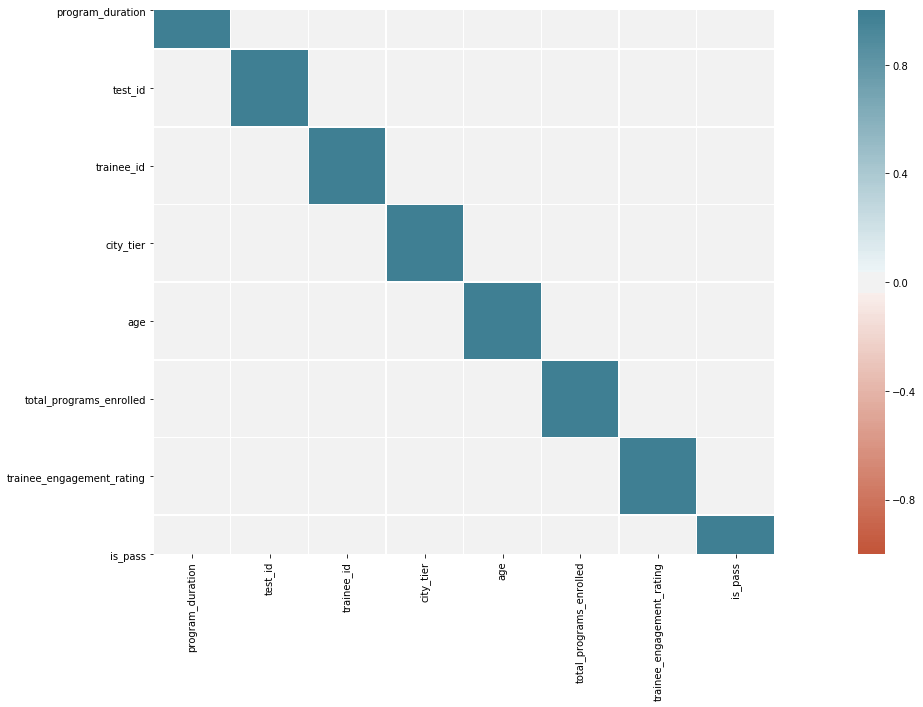

In [2]:
corr = data.corr()
plt.figure(figsize=(30,10))
ax = sns.heatmap(
    corr>0.9, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [3]:
print(data.columns)
data.program_type.unique()

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')


array(['Y', 'T', 'Z', 'V', 'U', 'X', 'S'], dtype=object)

In [4]:
gle = LabelEncoder()
program_type_dummies = gle.fit_transform(data['program_type'])
program_type_df = pd.DataFrame(program_type_dummies, columns = ['program_type_df'])
program_type_df

,program_type_df
0,5
1,1
2,6
3,1
4,3
5,1
6,5
7,2
8,2
9,5


In [5]:
test_type_dummies = gle.fit_transform(data['test_type'])
test_type_df = pd.DataFrame(test_type_dummies, columns = ['test_type_df'])
test_type_df

,test_type_df
0,0
1,0
2,1
3,0
4,0
5,0
6,1
7,1
8,0
9,0


In [6]:
difficulty_level_dummies = gle.fit_transform(data['difficulty_level'])
difficulty_level_df = pd.DataFrame(difficulty_level_dummies, columns = ['difficulty_level_df'])
difficulty_level_df

,difficulty_level_df
0,2
1,0
2,0
3,0
4,2
5,2
6,0
7,0
8,0
9,1


In [7]:
data['education'] = data['education'].map({'Matriculation':1, 'High School Diploma':2, 'Bachelors':3, 'Masters':4,
       'No Qualification':0})

In [8]:
complete_data = pd.concat([data, program_type_df, test_type_df, difficulty_level_df], axis=1)
complete_data

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_type_df,test_type_df,difficulty_level_df
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,1,3,24.0,5,N,1.0,0,5,0,2
1,16523_44,T_1,T,131,44,offline,easy,16523,F,2,4,26.0,2,N,3.0,1,1,0,0
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,1,1,40.0,1,N,2.0,1,6,1,0
3,13158_32,T_2,T,117,32,offline,easy,13158,F,1,3,NaN,4,N,1.0,1,1,0,0
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,2,1,42.0,2,N,4.0,1,3,0,2
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,2,1,29.0,4,N,2.0,0,1,0,2
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,3,2,48.0,3,N,3.0,1,5,1,0
7,8129_61,U_1,U,134,61,online,easy,8129,M,1,2,45.0,1,N,1.0,1,2,1,0
8,5652_57,U_1,U,134,57,offline,easy,5652,M,1,4,NaN,3,N,3.0,1,2,0,0
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,3,3,28.0,2,N,4.0,1,5,0,1


In [9]:
X = complete_data.drop(['id', 'program_id', 'age', 'is_pass', 'program_type', 'test_type', 'difficulty_level', 'test_id', 'trainee_id'], axis=1)
X.fillna(0 , inplace=True)
X.is_handicapped.replace({"N": "0", "Y": "1"}, inplace = True)
X['is_handicapped'] = X['is_handicapped'].astype(int)
X['trainee_engagement_rating'] = X['trainee_engagement_rating'].astype(int)
X.gender.replace({"M": "0", "F": "1"}, inplace = True)
X['gender'] = X['gender'].astype(int)
X

,program_duration,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_type_df,test_type_df,difficulty_level_df
0,136,0,1,3,5,0,1,5,0,2
1,131,1,2,4,2,0,3,1,0,0
2,120,0,1,1,1,0,2,6,1,0
3,117,1,1,3,4,0,1,1,0,0
4,131,1,2,1,2,0,4,3,0,2
5,134,1,2,1,4,0,2,1,0,2
6,120,0,3,2,3,0,3,5,1,0
7,134,0,1,2,1,0,1,2,1,0
8,134,0,1,4,3,0,3,2,0,0
9,136,0,3,3,2,0,4,5,0,1


In [10]:
y = complete_data['is_pass']
y

0        0
1        1
2        1
3        1
4        1
5        0
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       0
16       0
17       1
18       0
19       0
20       1
21       0
22       1
23       1
24       1
25       0
26       1
27       1
28       1
29       1
        ..
73117    1
73118    0
73119    0
73120    1
73121    1
73122    0
73123    1
73124    1
73125    1
73126    1
73127    1
73128    1
73129    0
73130    0
73131    1
73132    0
73133    1
73134    0
73135    1
73136    1
73137    1
73138    1
73139    1
73140    1
73141    1
73142    1
73143    1
73144    1
73145    1
73146    1
Name: is_pass, Length: 73147, dtype: int64

In [11]:
test_size = 0.3
seed = 3
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
num_folds = 10
scoring = 'roc_auc'

models = []
models.append(('Logistic', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB', XGBClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('Light', LGBMClassifier()))
models.append(('ADA', AdaBoostClassifier()))

In [13]:
results = []

names = []
model_comp = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Std Dev'])

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp = model_comp.append([{'Model': name, 'Test Accuracy': cv_results.mean(), 'Std Dev': cv_results.std()}])

model_comp



,Model,Test Accuracy,Std Dev
0,Logistic,0.669098,0.007320
0,CART,0.673956,0.006412
0,GB,0.714554,0.007160
0,Forest,0.703107,0.004350
0,Light,0.726828,0.007699
0,ADA,0.695717,0.007796


In [27]:
# Create Base Learners
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]

layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=RandomForestClassifier())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)
clf.fit(X_train, y_train).score(X_valid, y_valid)

0.6870813397129186

In [64]:
test_data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\test_wF0Ps6O.csv")
test_data

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0
5,18922_62,U_1,U,134,62,online,easy,18922,F,Matriculation,1,24.0,1,N,1.0
6,5499_29,T_3,T,134,29,online,easy,5499,F,High School Diploma,2,45.0,2,N,4.0
7,10150_125,Y_3,Y,135,125,offline,intermediate,10150,F,High School Diploma,1,33.0,4,N,2.0
8,10158_95,V_1,V,133,95,offline,easy,10158,F,High School Diploma,3,32.0,2,N,1.0
9,6215_17,T_4,T,120,17,online,easy,6215,F,High School Diploma,1,NaN,4,N,1.0


[]

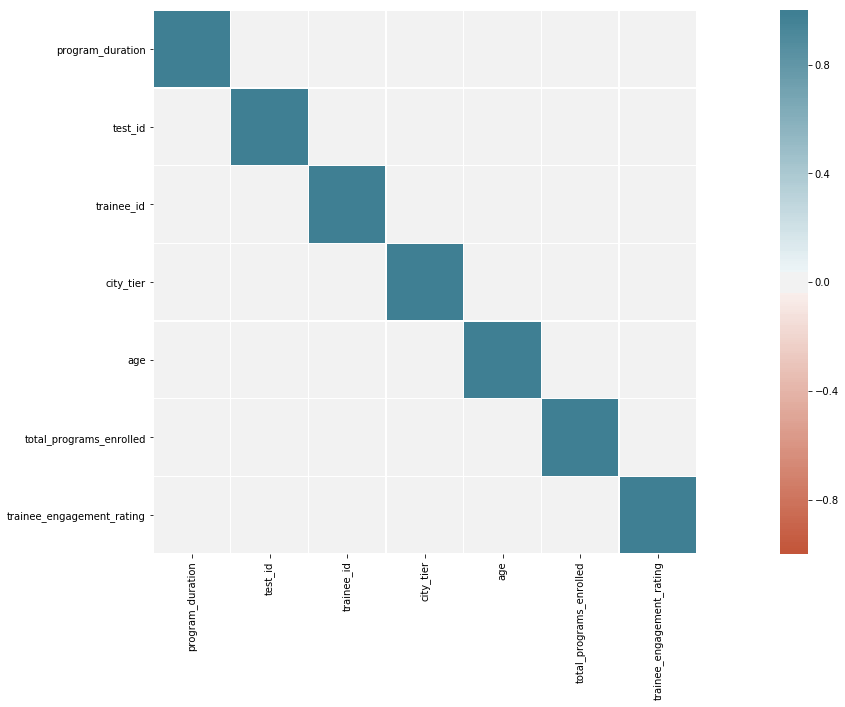

In [65]:
corr = test_data.corr()
plt.figure(figsize=(30,10))
ax = sns.heatmap(
    corr>0.9, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [66]:
gle = LabelEncoder()
program_type_dummies = gle.fit_transform(test_data['program_type'])
program_type_df = pd.DataFrame(program_type_dummies, columns = ['program_type_df'])
program_type_df

,program_type_df
0,1
1,5
2,5
3,3
4,3
5,2
6,1
7,5
8,3
9,1


In [67]:
test_type_dummies = gle.fit_transform(test_data['test_type'])
test_type_df = pd.DataFrame(test_type_dummies, columns = ['test_type_df'])
test_type_df

,test_type_df
0,0
1,1
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,1


In [68]:
difficulty_level_dummies = gle.fit_transform(test_data['difficulty_level'])
difficulty_level_df = pd.DataFrame(difficulty_level_dummies, columns = ['difficulty_level_df'])
difficulty_level_df

,difficulty_level_df
0,2
1,0
2,0
3,3
4,2
5,0
6,0
7,2
8,0
9,0


In [69]:
test_data['education'] = test_data['education'].map({'Matriculation':1, 'High School Diploma':2, 'Bachelors':3, 'Masters':4,
       'No Qualification':0})

In [70]:
complete_data_test = pd.concat([test_data, program_type_df, test_type_df, difficulty_level_df], axis=1)
complete_data_test

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_type_df,test_type_df,difficulty_level_df
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,1,3,46.0,2,N,4.0,1,0,2
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,3,3,NaN,4,N,4.0,5,1,0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,1,3,NaN,2,N,3.0,5,1,0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,2,1,NaN,2,N,2.0,3,0,3
4,888_71,V_4,V,122,71,offline,intermediate,888,F,1,3,NaN,2,N,2.0,3,0,2
5,18922_62,U_1,U,134,62,online,easy,18922,F,1,1,24.0,1,N,1.0,2,1,0
6,5499_29,T_3,T,134,29,online,easy,5499,F,2,2,45.0,2,N,4.0,1,1,0
7,10150_125,Y_3,Y,135,125,offline,intermediate,10150,F,2,1,33.0,4,N,2.0,5,0,2
8,10158_95,V_1,V,133,95,offline,easy,10158,F,2,3,32.0,2,N,1.0,3,0,0
9,6215_17,T_4,T,120,17,online,easy,6215,F,2,1,NaN,4,N,1.0,1,1,0


In [71]:
X_test = complete_data_test.drop(['id', 'program_id', 'age', 'program_type', 'test_type', 'difficulty_level', 'test_id', 'trainee_id'], axis=1)
X_test.fillna(0 , inplace=True)
X_test.is_handicapped.replace({"N": "0", "Y": "1"}, inplace = True)
X_test['is_handicapped'] = X_test['is_handicapped'].astype(int)
X_test['trainee_engagement_rating'] = X_test['trainee_engagement_rating'].astype(int)
X_test.gender.replace({"M": "0", "F": "1"}, inplace = True)
X_test['gender'] = X_test['gender'].astype(int)
X_test

,program_duration,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,program_type_df,test_type_df,difficulty_level_df
0,131,1,1,3,2,0,4,1,0,2
1,135,0,3,3,4,0,4,5,1,0
2,120,0,1,3,2,0,3,5,1,0
3,122,1,2,1,2,0,2,3,0,3
4,122,1,1,3,2,0,2,3,0,2
5,134,1,1,1,1,0,1,2,1,0
6,134,1,2,2,2,0,4,1,1,0
7,135,1,2,1,4,0,2,5,0,2
8,133,1,2,3,2,0,1,3,0,0
9,120,1,2,1,4,0,1,1,1,0


In [96]:
model_light = LGBMRegressor(boosting_type='gbdt', silent=True)

#Fit to training data
model_light.fit(X, y)
#Generate Predictions
y_pred=model_light.predict(X_test)
# classes = "class1,class2,class3,class4,class5,class6,class7,class8,class9".split(',')
# subm = pd.DataFrame(y_pred, columns=classes)
# subm['ID'] = ID_test
# #Save predictions to 'output.csv'
# subm.to_csv('output.csv', index=False)
output = np.where(y_pred > 0.7, 1, 0)
output
subm = pd.DataFrame(output, columns=['is_pass'])
subm.is_pass.value_counts()
subm.to_csv('submission.csv', index=False)